<a href="https://colab.research.google.com/github/ssmirnov4/Cancer-recurrence/blob/main/cancer_recurrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание 2

#Визуальный анализ данных

**Цель работы:** изучить программные средства, используемые для визуализации наборов данных

Набор данных содержит 13 клинико-патологических признаков, направленных на прогнозирование рецидива высокодифференцированного рака щитовидной железы. Набор данных собирался в течение 15 лет, и каждый пациент наблюдался в течение не менее 10 лет. Содержит следующие атрибуты:
* **Age** – Возраст
* **Gender** – Пол
* **Smoking** - Курение
* **Hx Smoking** – Курил ли человек
* **Hx Radiothreapy** – Лучевая терапия
* **Thyroid Function** – Функция щитовидной железы
* **Physical Examination** – Физическое обследование
* **Adenopathy** – Аденопатия
* **Pathology** – Патология
* **Focality** – Фокальность
* **Risk** – Риск
* **T** – Размер первичной опухоли
* **N** – Метастазы в лимфоузлы
* **M** – Отдаленные метастазы
* **Stage** – Этап
* **Response** – Реакция
* **Recurred** – Рецидив (целевая переменная)

### 1. Импортируем необходимые библиотеки

In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### 2. Импортируем набор данных из файла Thyroid_Diff.csv и поместим его в объект DataFrame.

In [75]:
data = pd.read_csv("Thyroid_Diff.csv")
data.head(10)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


### 3. Получим сводную информацию по датафрейму

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

#### Преобразуем все типы object в int64 и получим сводную информацию

In [81]:

data['T'] = data['T'].replace({
    'T1a': 1,
    'T1b': 2,
    'T2': 3,
    'T3a': 4,
    'T3b': 5,
    'T4a': 6,
    'T4b': 7
}).astype(int)

data['N'] = data['N'].replace({
    'N0': 0,
    'N1': 1,
    'N1a': 1,
    'N1b': 2  # если в датасете есть подтип N1b, можно отделить
}).astype(int)

data['M'] = data['M'].replace({
    'M0': 0,
    'M1': 1
}).astype(int)

data['Stage'] = data['Stage'].replace({
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'IVA': 5,
    'IVB': 6,
    'IVC': 7
}).astype(int)

data['Risk'] = data['Risk'].replace({
    'Low': 1,
    'Intermediate': 2,
    'High': 3
}).astype(int)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    int64 
 11  T                     383 non-null    int64 
 12  N                     383 non-null    int64 
 13  M                     383 non-null    int64 
 14  Stage                 383 non-null    int64 
 15  Response              383 non-null    ob

### 4. Визуализация количественных признаков

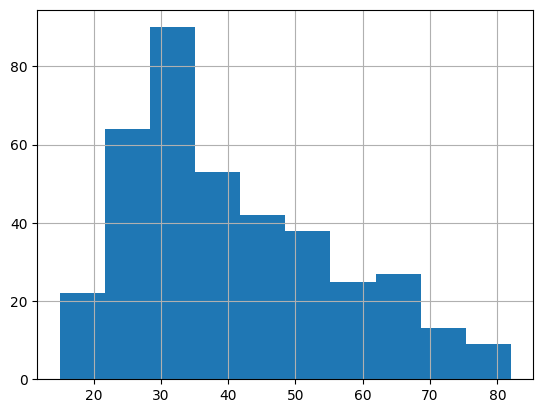

In [82]:
data['Age'].hist();

#### Изменим размер фигуры и применим метод hist() для визуализации распределения нескольких признаков:

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Risk'}>],
       [<Axes: title={'center': 'T'}>, <Axes: title={'center': 'N'}>],
       [<Axes: title={'center': 'M'}>, <Axes: title={'center': 'Stage'}>]],
      dtype=object)

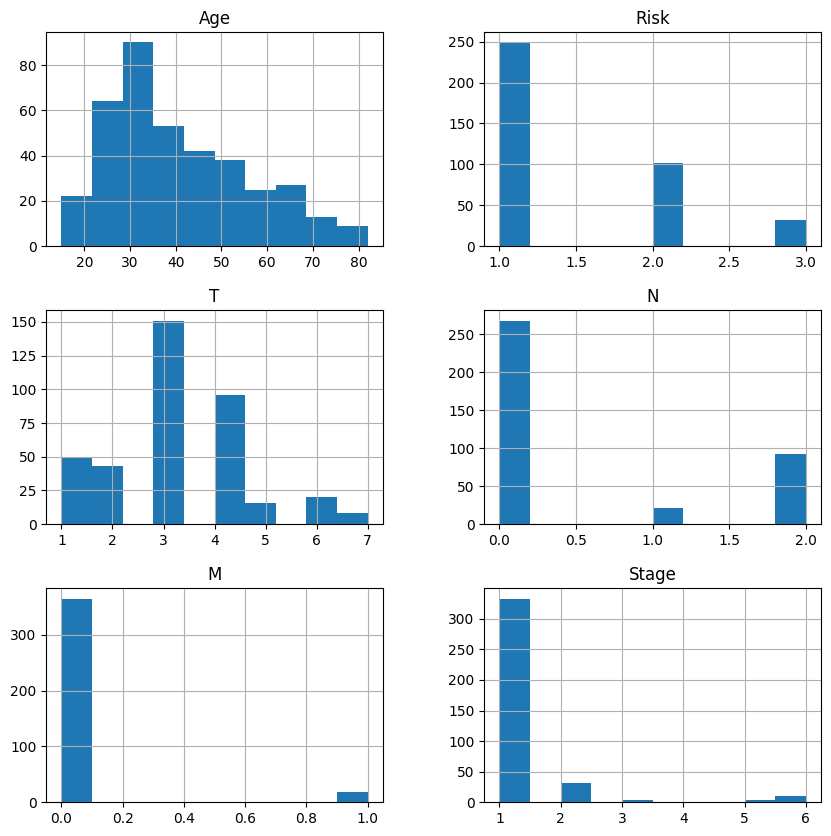

In [83]:
data.hist(figsize=(10, 10))

#### Аналогичный тип графика можно получить с использованием matplotlib:

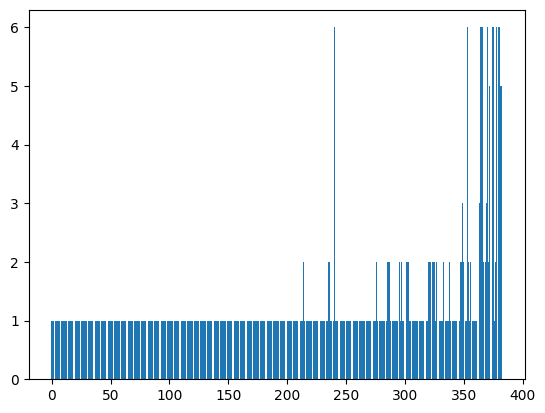

In [85]:
plt.bar(data.index, data['Stage'])
plt.show()

#### График распределения

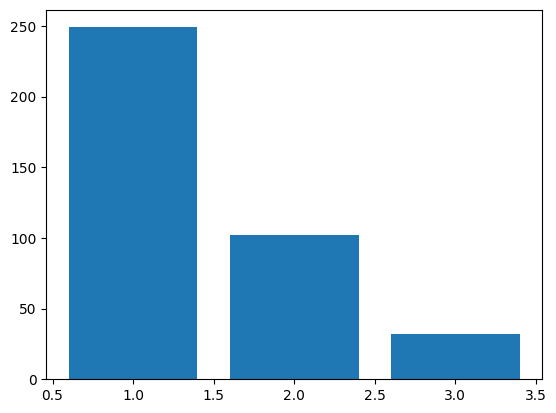

In [86]:
hist = data['Risk'].value_counts()
plt.bar(hist.index, hist);

#### Использование библиотеки Seaborn для построения диаграммы типа "ящик с усами"

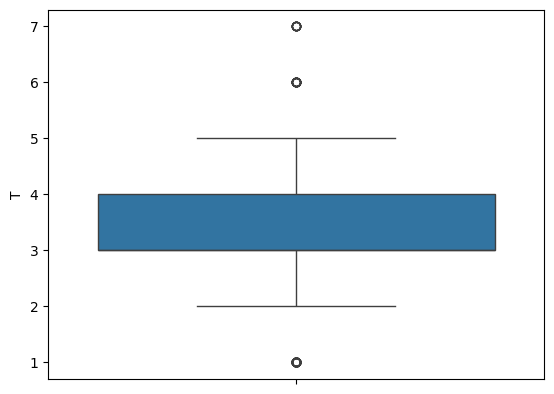

In [87]:
sns.boxplot(data['T']);

#### Ниже представлен код и результат построения графиков для анализа размера опухоли (Т) и курил ли человек.

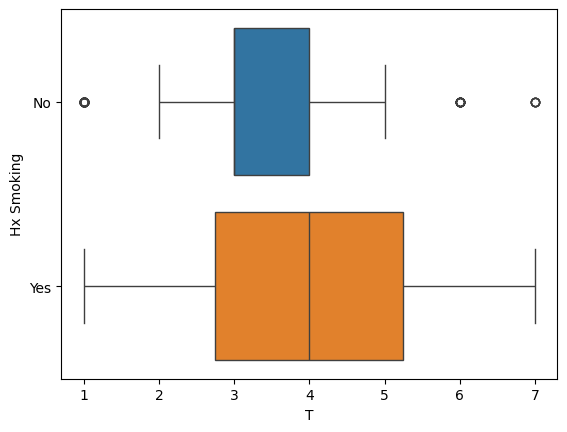

In [89]:
sns.boxplot(y='Hx Smoking', x='T', data=data, hue='Hx Smoking');

### 5. Визуализация категориальных признаков

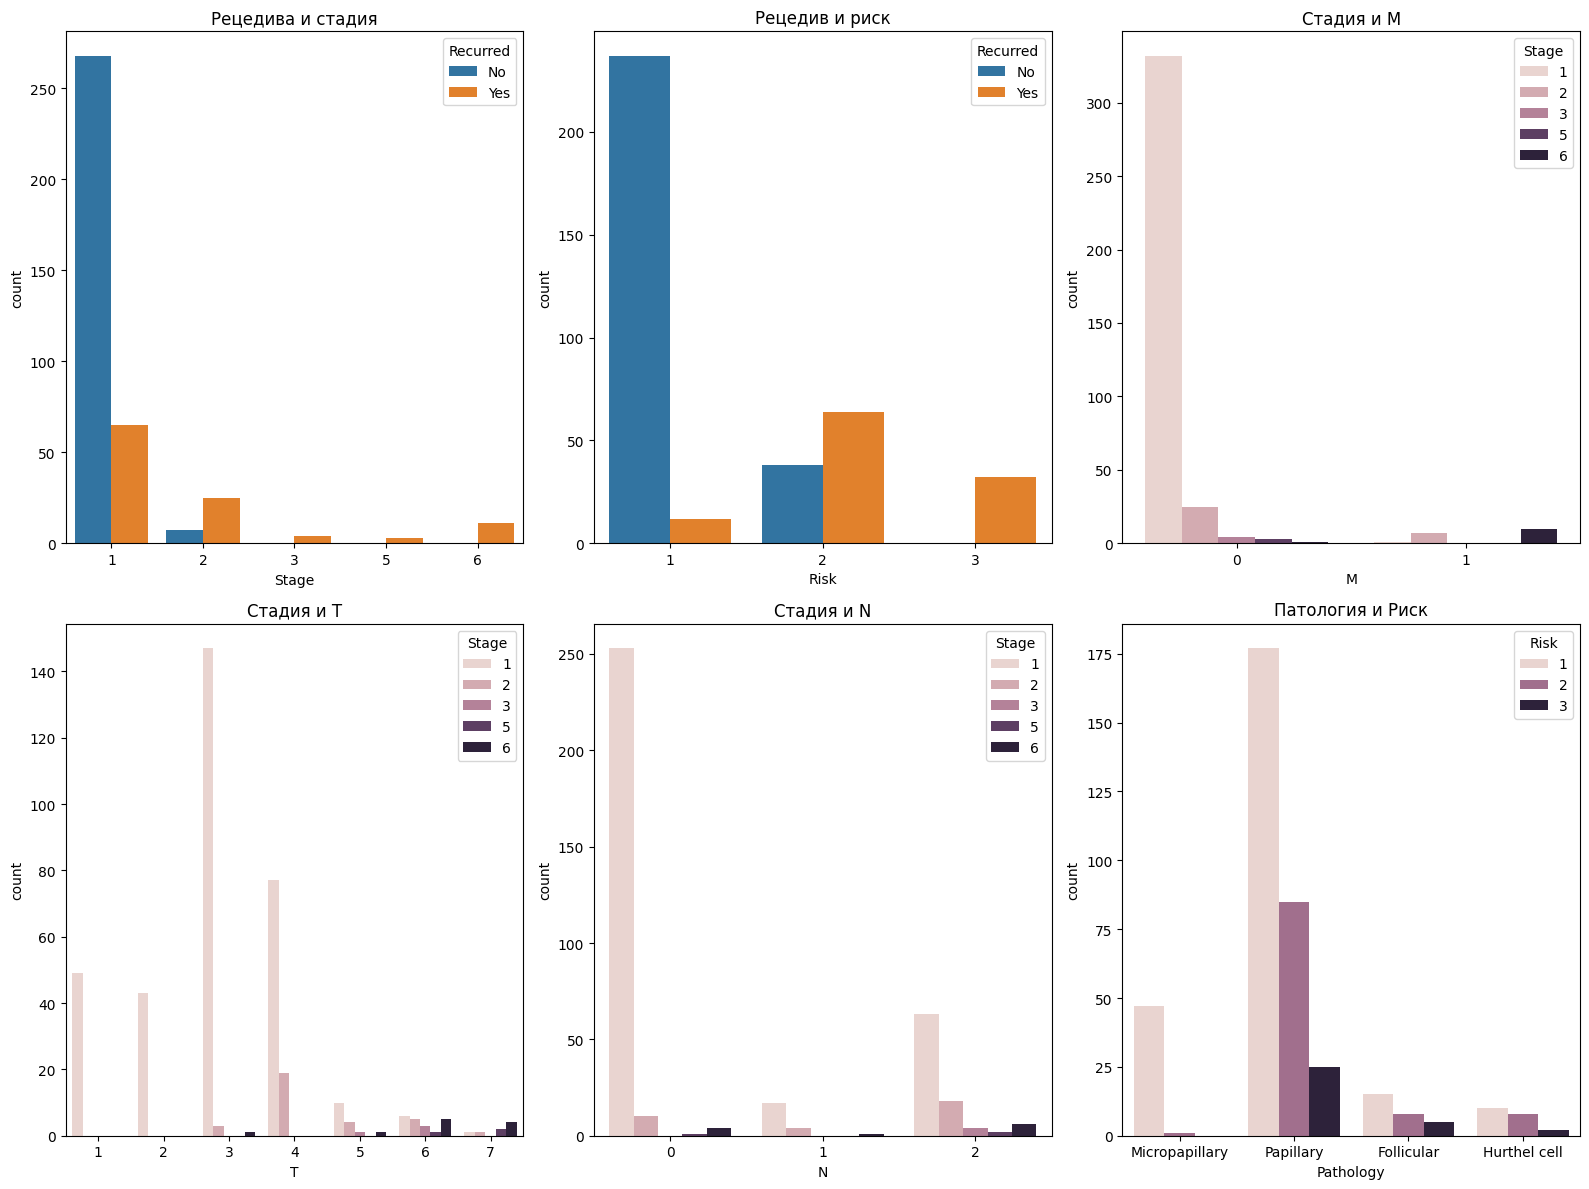

In [108]:
fig1, (axes1, axes2) = plt.subplots(ncols=3, nrows=2, figsize=(16, 12))

sns.countplot(data=data, x="Stage", hue="Recurred", ax=axes1[0])
axes1[0].set_title('Рецедива и стадия')

sns.countplot(data=data, x="Risk", hue="Recurred", ax=axes1[1])
axes1[1].set_title('Рецедив и риск')

sns.countplot(data=data, x="M", hue="Stage", ax=axes1[2])
axes1[2].set_title('Стадия и M')

sns.countplot(data=data, x="T", hue="Stage", ax=axes2[0])
axes2[0].set_title('Стадия и T')

sns.countplot(data=data, x="N", hue="Stage", ax=axes2[1])
axes2[1].set_title('Стадия и N')

sns.countplot(data=data, x="Pathology", hue="Risk", ax=axes2[2])
axes2[2].set_title('Патология и Риск')

plt.tight_layout()
plt.show()

#### Гистограмма, показывающая ТОП-3 стадий по частоте рецидивов

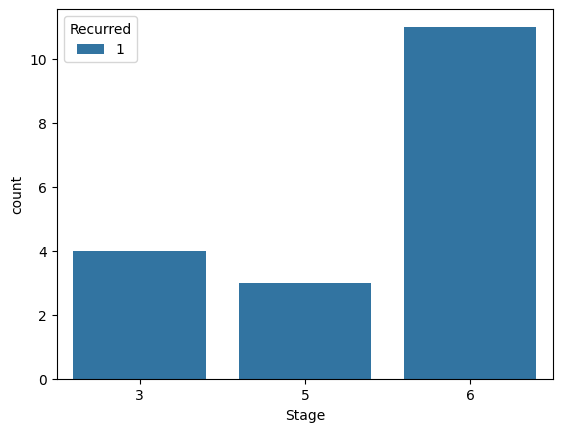

In [117]:
data['Recurred'] = data['Recurred'].replace({'No': 0, 'Yes': 1}).astype(int)
top_stage_recurred = data.groupby('Stage')['Recurred'].mean().sort_values(ascending=False).head(3).index
sns.countplot(data=data[data['Stage'].isin(top_stage_recurred)],
              x='Stage', hue='Recurred')
plt.show()


#### Гистограмма для всех стадий

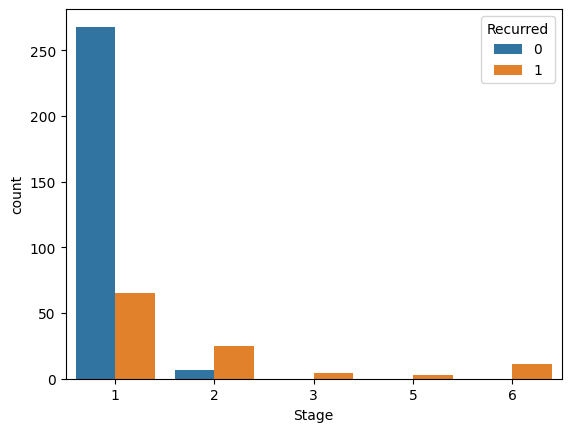

In [118]:
data['Recurred'] = data['Recurred'].replace({'No': 0, 'Yes': 1}).astype(int)
top_stage_recurred = data.groupby('Stage')['Recurred'].mean().sort_values(ascending=False).index
sns.countplot(data=data[data['Stage'].isin(top_stage_recurred)],
              x='Stage', hue='Recurred')
plt.show()


#### Определение первых n "популярных" стадий

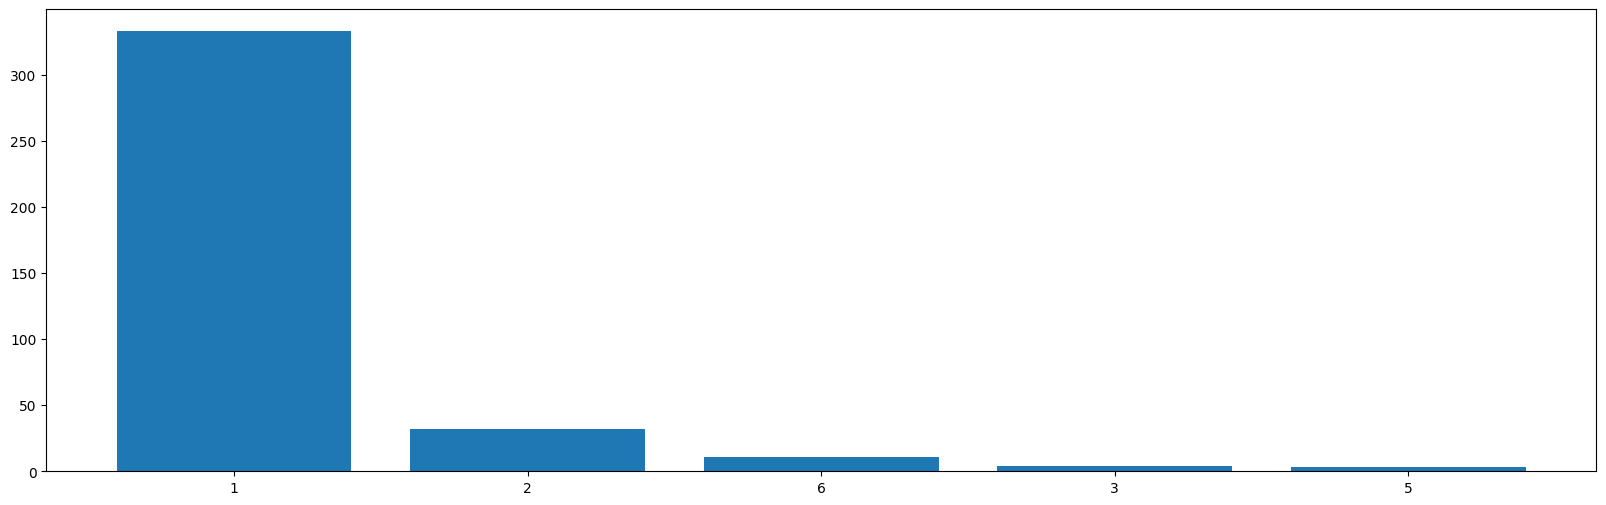

In [122]:
fig = plt.subplots(figsize = (20,6))
hist = data['Stage'].value_counts()
plt.bar(hist.index.astype("str"), hist)
plt.show()

#### Попарное распределение индексов

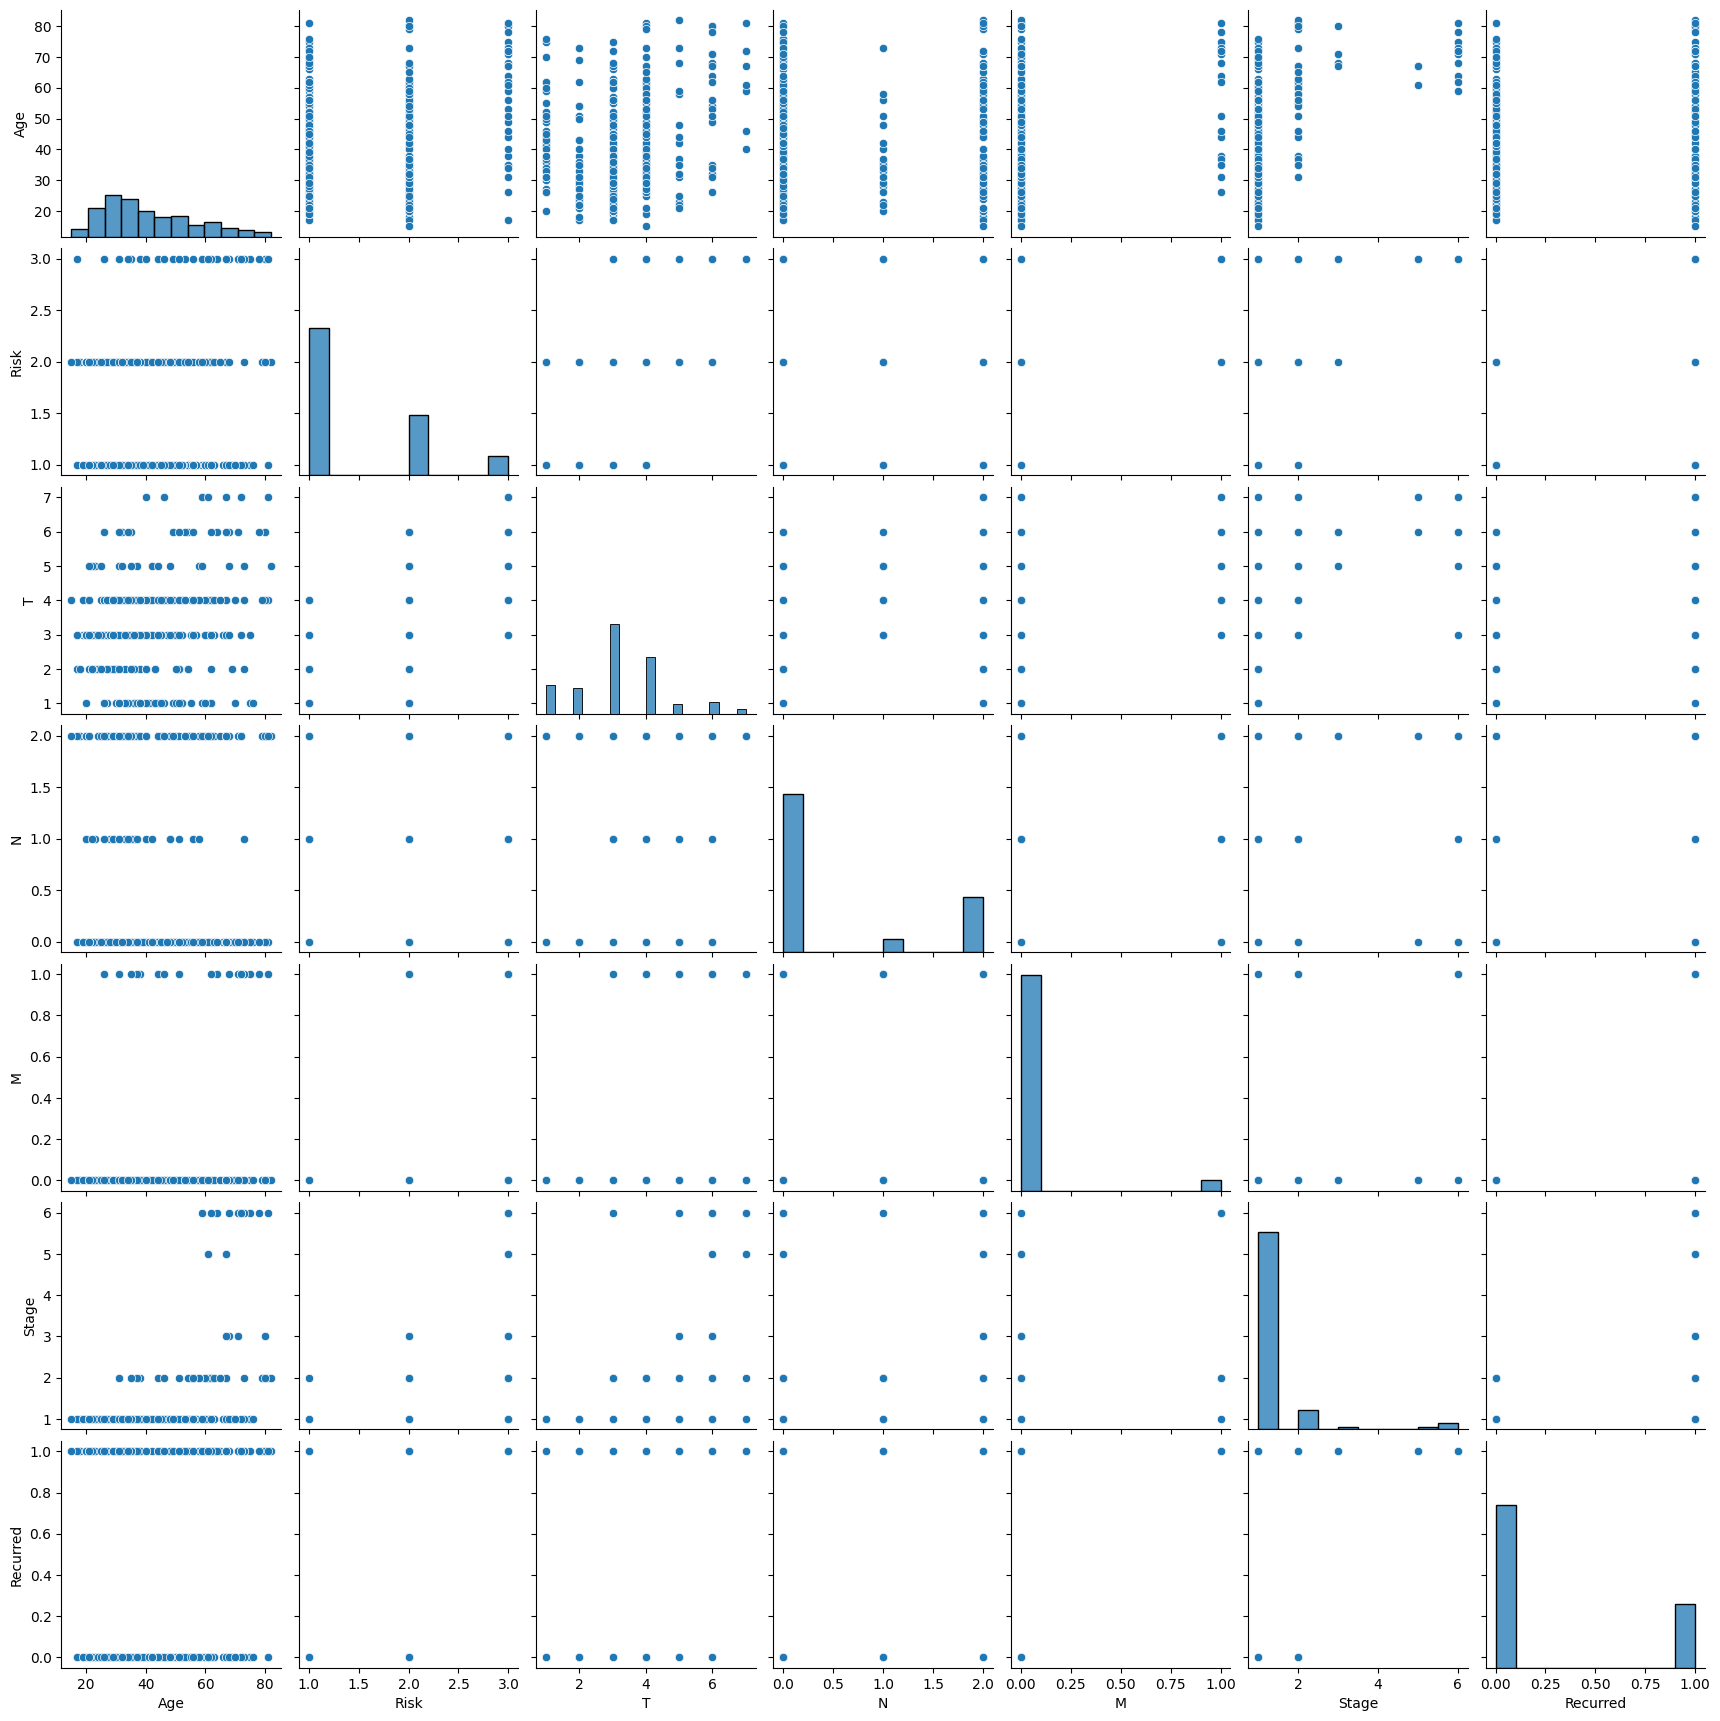

In [123]:
sns.pairplot(data);

#### Добавление целевого признака:

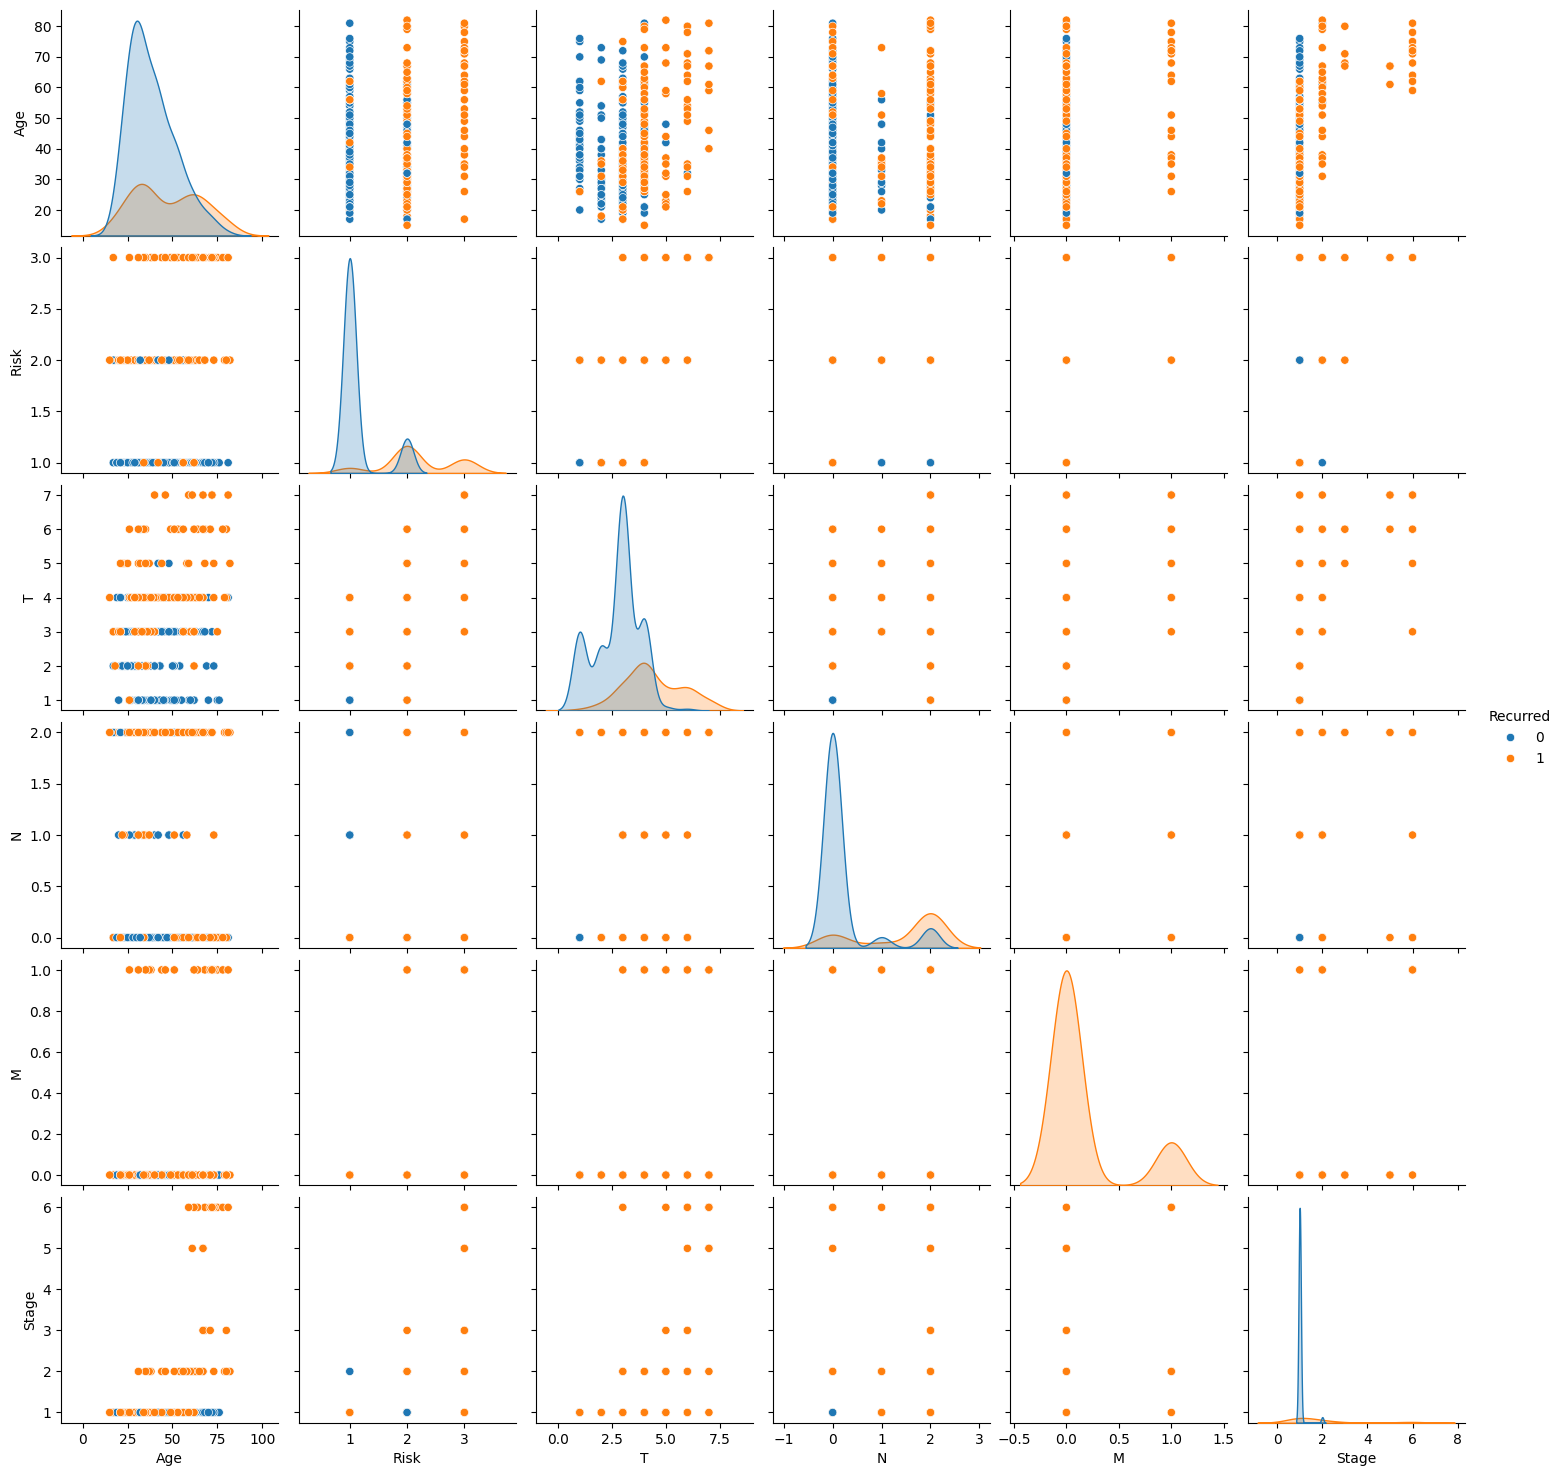

In [124]:
sns.pairplot(data, hue = "Recurred");

#### Использование matplotlib, подписей данных, заголовков и простейших пользовательских цветов:

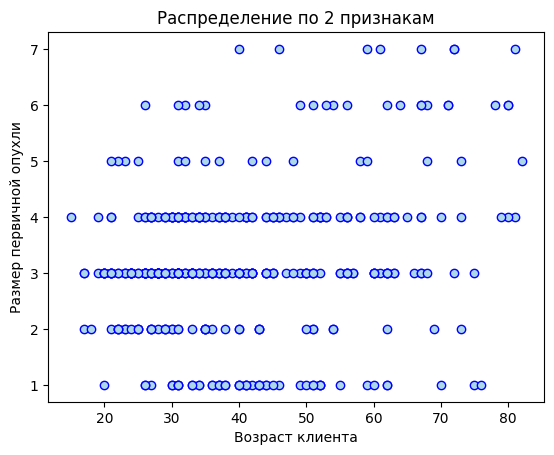

In [125]:
plt.scatter(data['Age'],
            data['T'],
            color='lightblue', edgecolors='blue')

plt.xlabel('Возраст клиента')
plt.ylabel('Размер первичной опухли')
plt.title('Pаспределение по 2 признакам');

#### Раскрашивание данных:

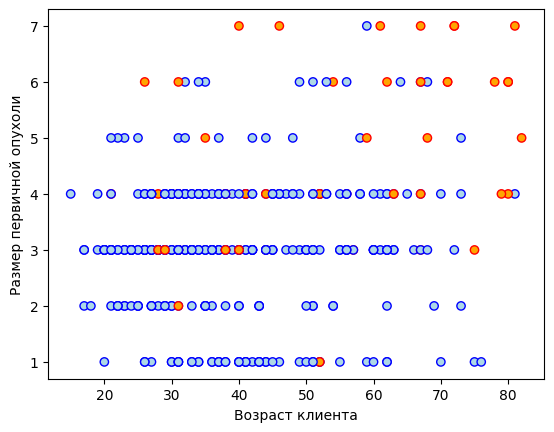

In [145]:
c = data['Smoking'].map({'No': 'lightblue', 'Yes': 'orange'})
edge_c = data['Smoking'].map({'No': 'blue', 'Yes': 'red'})
# Настройка графика
plt.scatter(data['Age'], data['T'], color=c, edgecolors=edge_c)
plt.xlabel('Возраст клиента')
plt.ylabel('Размер первичной опухоли');

#### Раскраска по курящим

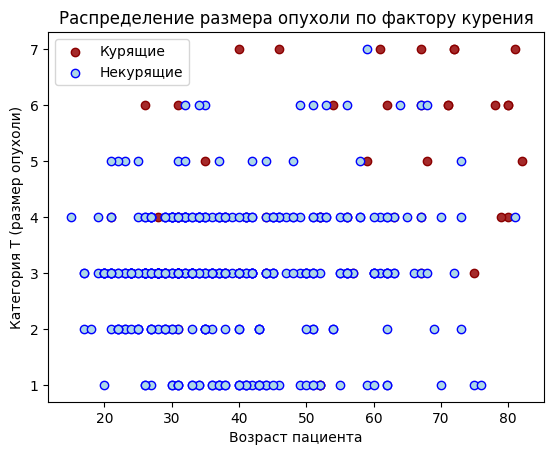

In [152]:
data_smokers = data[data['Smoking'] == 'Yes']
data_nonsmokers = data[data['Smoking'] == 'No']

plt.scatter(data_smokers['Age'], data_smokers['T'],
            color='brown', edgecolors='darkred', label='Курящие')

plt.scatter(data_nonsmokers['Age'], data_nonsmokers['T'],
            color='lightblue', edgecolors='blue', label='Некурящие')

plt.xlabel('Возраст пациента')
plt.ylabel('Категория T (размер опухоли)')
plt.title('Распределение размера опухоли по фактору курения')
plt.legend(loc='best')
plt.show()

### 6. Корреляция признаков

In [155]:
data.corr(numeric_only=True)

,Age,Risk,T,N,M,Stage,Recurred
Age,1.000000,0.295556,0.242670,0.061243,0.235401,0.503965,0.258897
Risk,0.295556,1.000000,0.680255,0.696764,0.503143,0.601332,0.733376
T,0.242670,0.680255,1.000000,0.458701,0.388490,0.525205,0.556201
N,0.061243,0.696764,0.458701,1.000000,0.219269,0.254797,0.632323
M,0.235401,0.503143,0.388490,0.219269,1.000000,0.679414,0.354360
Stage,0.503965,0.601332,0.525205,0.254797,0.679414,1.000000,0.429342
Recurred,0.258897,0.733376,0.556201,0.632323,0.354360,0.429342,1.000000


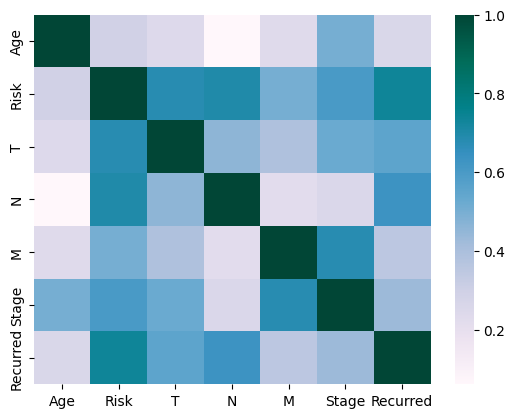

In [156]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn);
